# Fraud Detection

## Data Loading and assessment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("creditcard.csv", dtype = {"Class" : "str"},  parse_dates=['Time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null object
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26   

C:\Users\NOTEBOOK\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


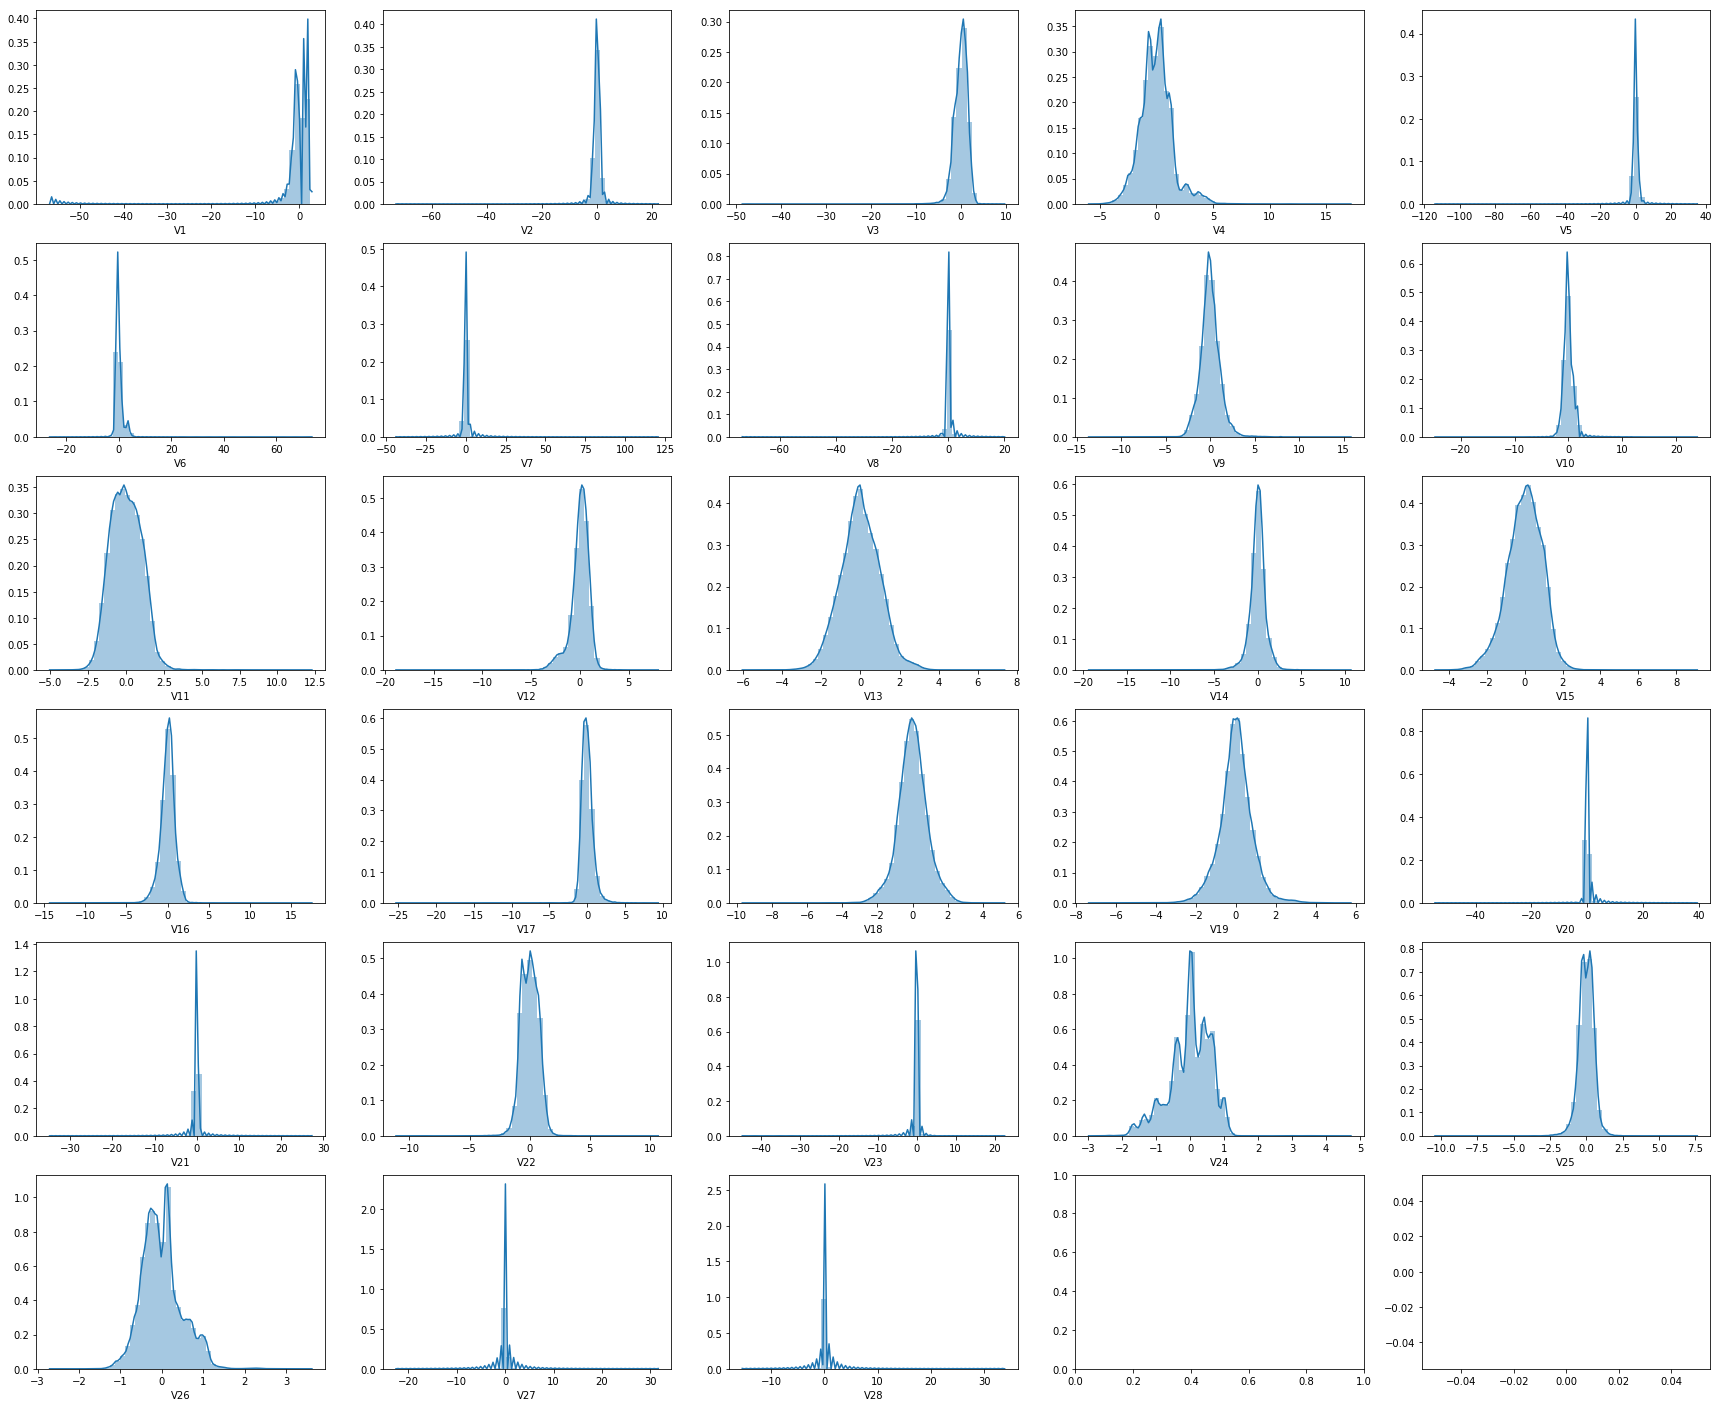

In [3]:
def plot_unnamed(df) :
    f , ((ax1, ax2, ax3, ax4, ax5),
         (ax6, ax7, ax8, ax9, ax10),
         (ax11 ,ax12, ax13, ax14, ax15), 
         (ax16, ax17, ax18, ax19, ax20),
         (ax21, ax22, ax23, ax24, ax25),
         (ax26, ax27, ax28, ax29, ax30)
        ) = plt.subplots(nrows = 6, ncols = 5, figsize = (30, 25) )

    axes = [ax1, ax2, ax3, ax4, ax5,
            ax6, ax7, ax8, ax9, ax10,
            ax11 ,ax12, ax13, ax14, ax15, 
            ax16, ax17, ax18, ax19, ax20,
            ax21, ax22, ax23, ax24, ax25,
            ax26, ax27, ax28, ax29, ax30]

    for variable in range(1, 29) :
      sn.distplot(df[ "V" + str(variable)], ax = axes[variable - 1])

    plt.plot()
    f.savefig("variable_distributions")
    
plot_unnamed(data)    

C:\Users\NOTEBOOK\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


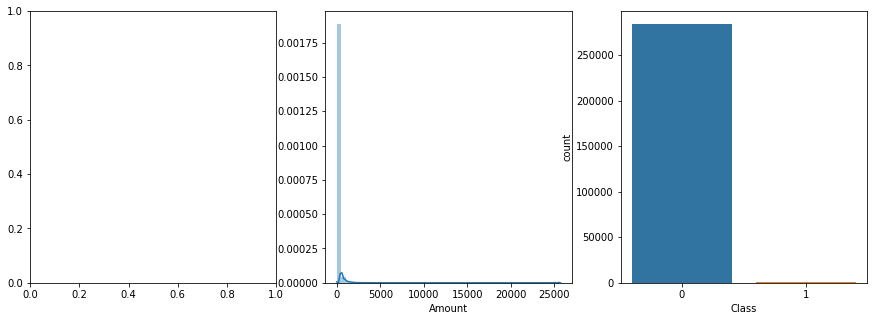

In [4]:
def plot_named(df) :

    f , ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5) )

    #sn.countplot(df["Time"].astype("str"), ax = ax1)
    sn.distplot(df["Amount"], ax = ax2)
    sn.countplot(df["Class"], ax = ax3)

    plt.plot()
    f.savefig("named_distributions.png")

plot_named(data)

## Building data sets

In [5]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(data, stratify = data["Class"], test_size =  0.2, random_state = 42)

C:\Users\NOTEBOOK\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


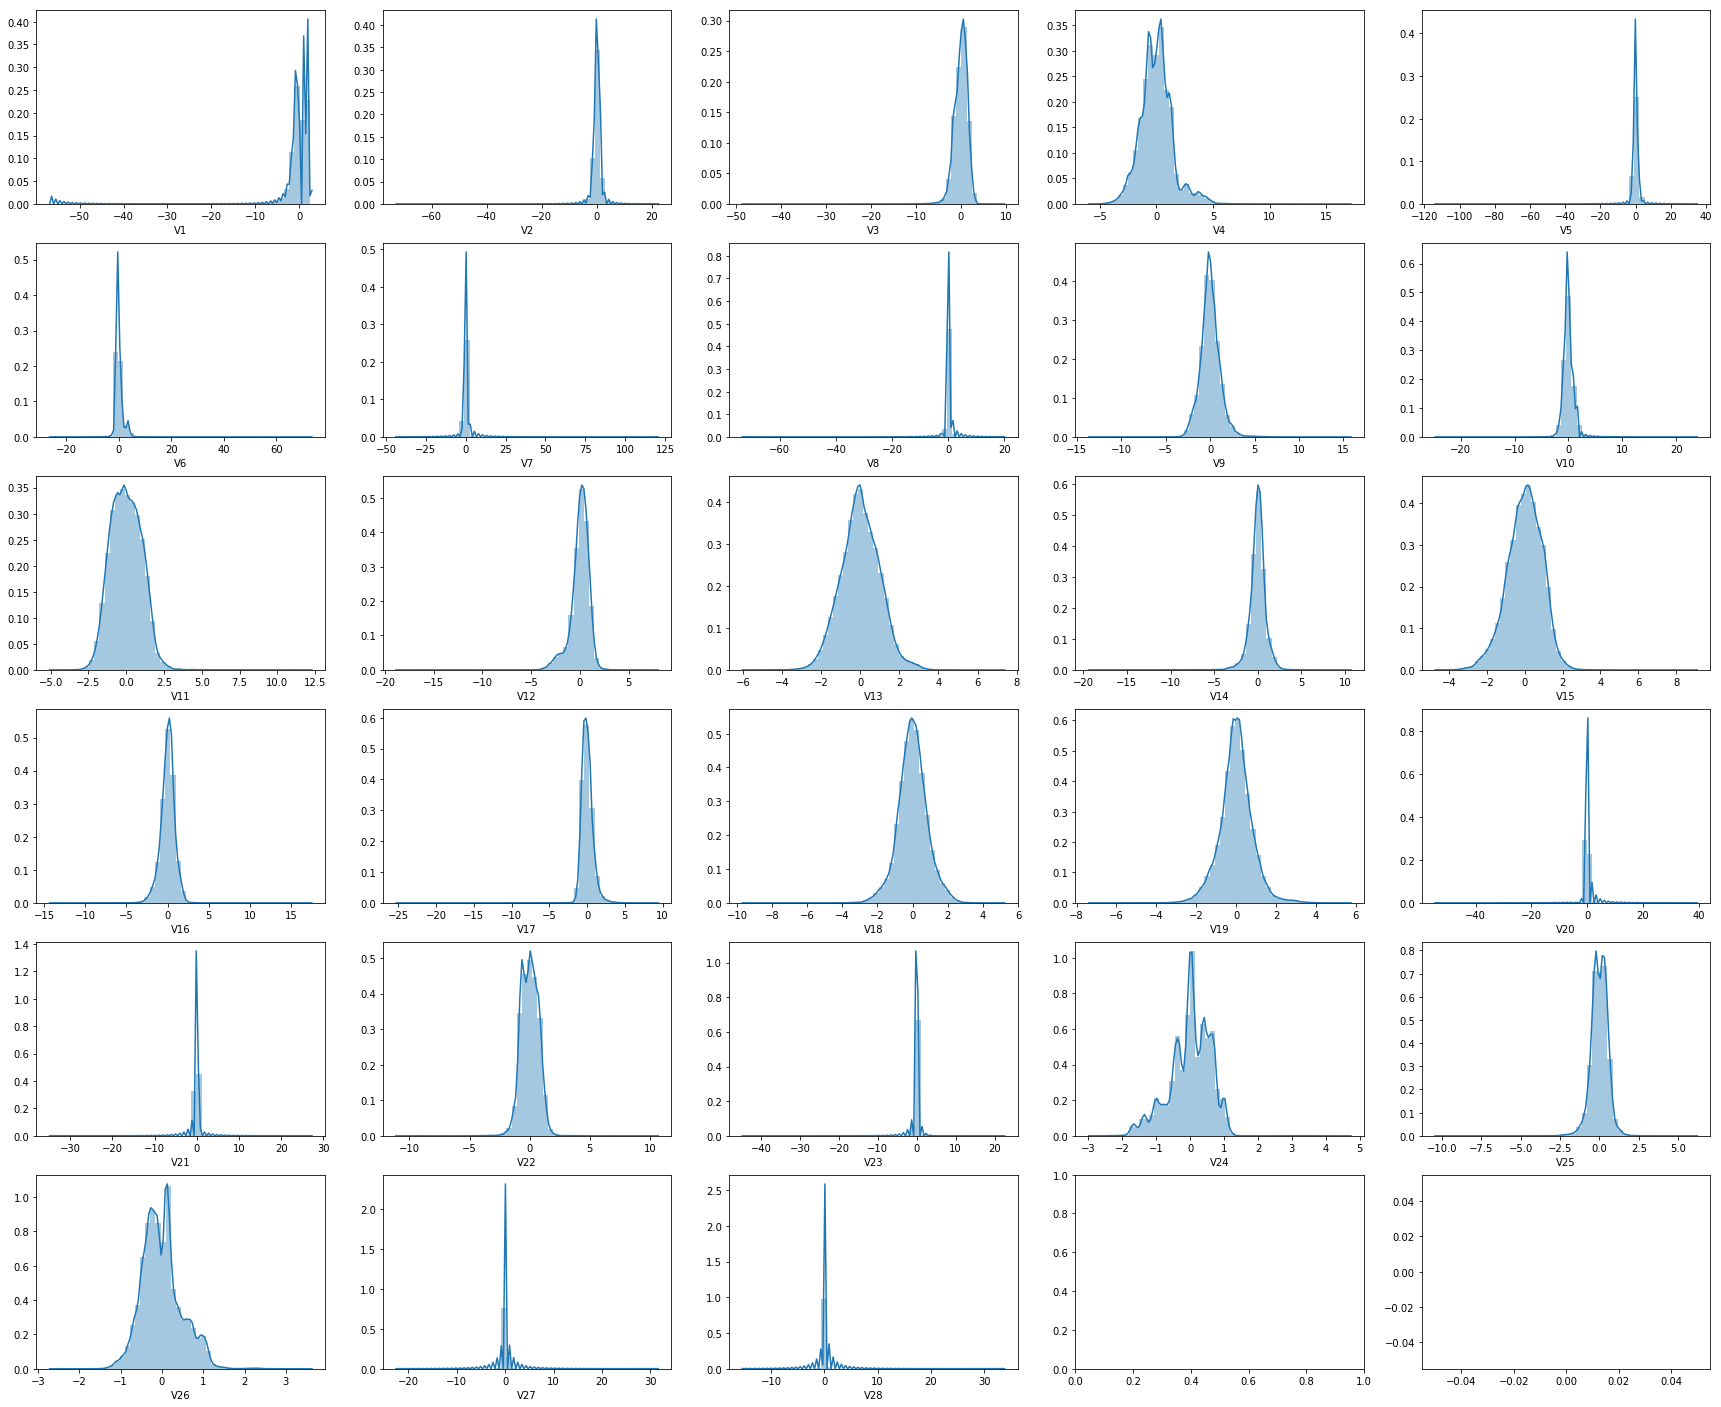

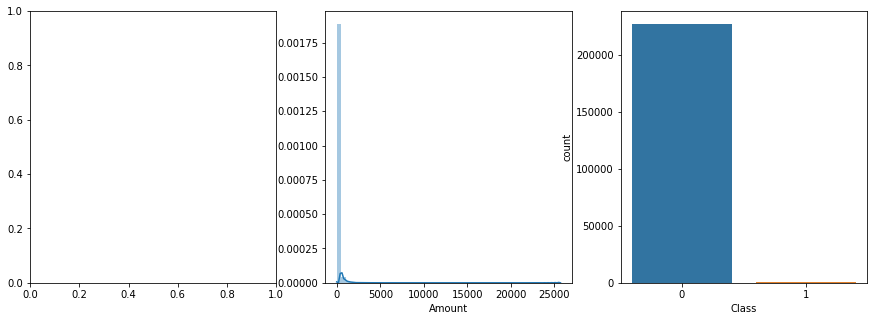

In [6]:
from os import mkdir, chdir
from os.path import exists
from scipy.stats import pearsonr

if not exists("TrainingData") :
    mkdir("TrainingData")    
chdir("TrainingData") 

plot_unnamed(training_set)
plot_named(training_set)

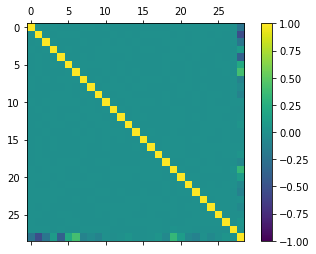

In [7]:
def plot_correlation(data) :
    fig = plt.figure()
    ax = fig.add_subplot(111)
    matrix = ax.matshow(data.corr(), vmin=-1, vmax=1)
    fig.colorbar(matrix)

plot_correlation(training_set)
plt.savefig("correlations.png")

As variables come from PCA they are uncorrelated.

### Conditionnal characteristics

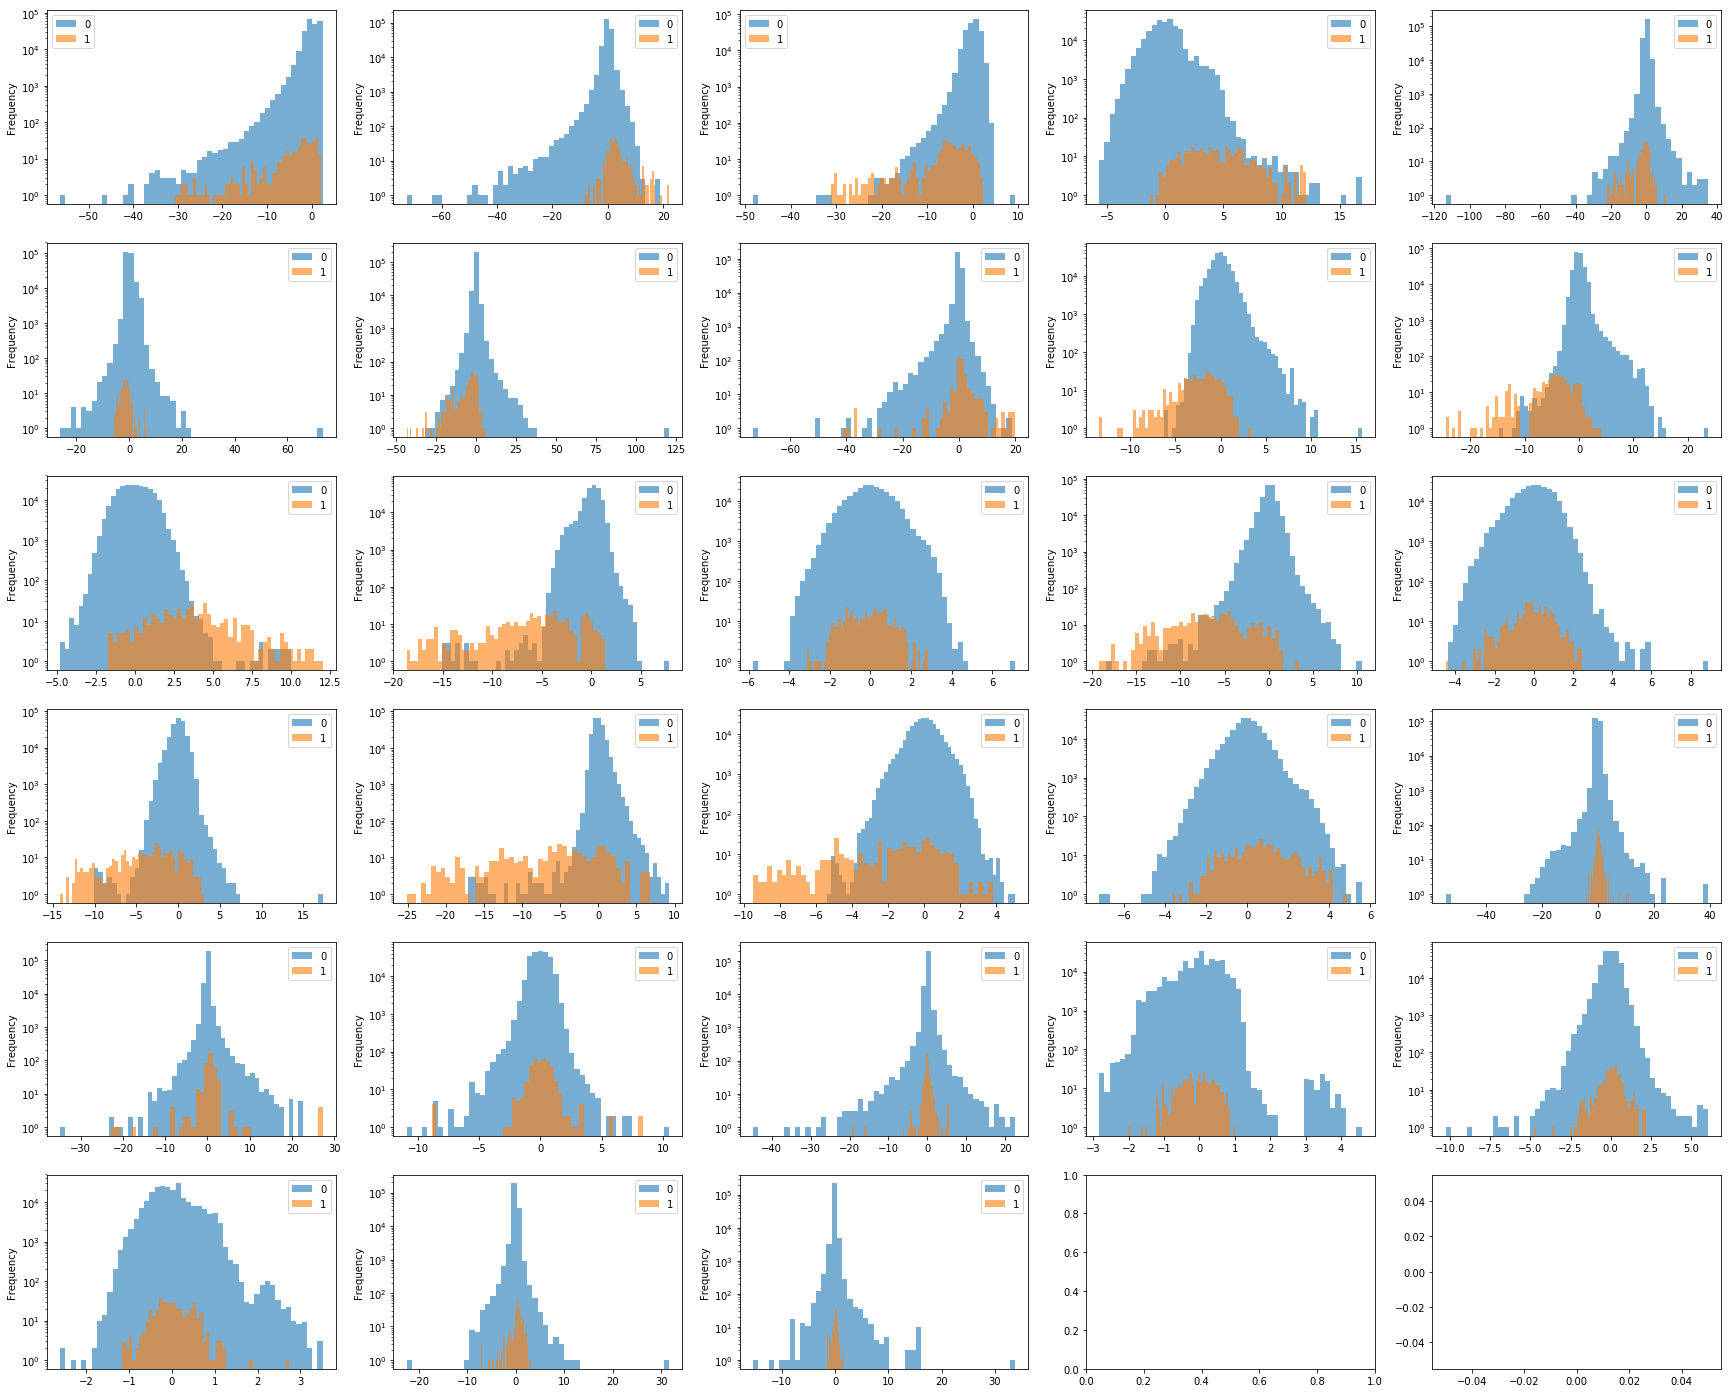

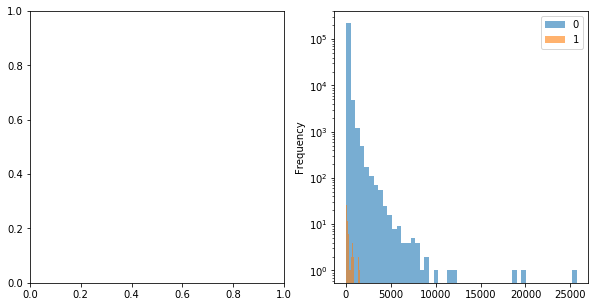

In [8]:
def hist(df, variable, group_by, bins=50, ax = None) :
    V = df[variable]
    V.plot(kind='hist', bins = 50, alpha=.6, legend=True, logy = True, ax = ax)

def cond_dist_unnamed(df, group_by) :
    
    f , ((ax1, ax2, ax3, ax4, ax5),
         (ax6, ax7, ax8, ax9, ax10),
         (ax11 ,ax12, ax13, ax14, ax15), 
         (ax16, ax17, ax18, ax19, ax20),
         (ax21, ax22, ax23, ax24, ax25),
         (ax26, ax27, ax28, ax29, ax30)
        ) = plt.subplots(nrows = 6, ncols = 5, figsize = (30, 25))

    axes = [ax1, ax2, ax3, ax4, ax5,
            ax6, ax7, ax8, ax9, ax10,
            ax11 ,ax12, ax13, ax14, ax15, 
            ax16, ax17, ax18, ax19, ax20,
            ax21, ax22, ax23, ax24, ax25,
            ax26, ax27, ax28, ax29, ax30]

    df = df.groupby(group_by)
    for variable in range(1, 29) :
        hist(df,  "V" + str(variable), group_by, ax  = axes[variable - 1])
    plt.plot()
    f.savefig("variable_conditionnal_distributions.png")

def cond_dist_named(df, group_by) :
    
    f , ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
    df = df.groupby(group_by)
    #hist(df,  "Time", group_by, ax  = ax1)
    hist(df,  "Amount", group_by, ax  = ax2)
    plt.plot()
    f.savefig("named_conditionnal_distributions.png")

cond_dist_unnamed(training_set, group_by = "Class")
cond_dist_named(training_set, group_by = "Class")

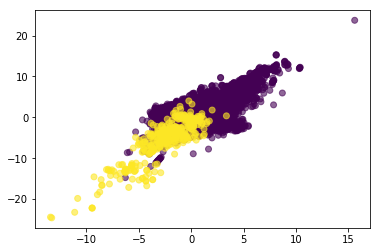

In [9]:
data = training_set.sort_values("Class") 

plt.scatter(x = data["V9"], y= data["V10"], c = data["Class"], alpha  = 0.6)

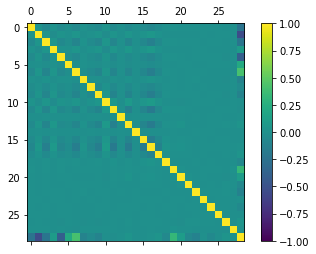

In [10]:
gr = training_set.groupby('Class')
gr0 = gr.get_group("0")

plot_correlation(gr0)
plt.savefig("gr0_correlations.png")

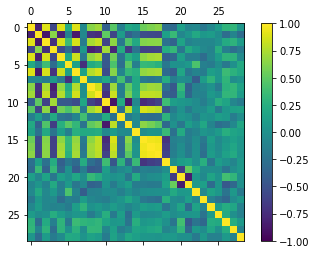

In [11]:
gr1 = gr.get_group("1")

plot_correlation(gr1)
plt.savefig("gr1_correlations.png")

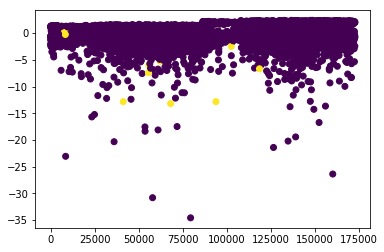

In [12]:
plt.scatter(training_set["Time"][0:10000].astype("int"), training_set["V1"][0:10000],
            c = training_set["Class"][0:10000])

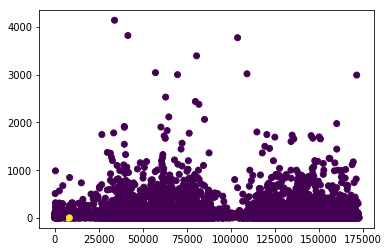

In [13]:
plt.scatter(training_set["Time"][0:10000].astype("int"), training_set["Amount"][0:10000],
            c = training_set["Class"][0:10000])

Conditional exploration revealed interesting pattern of data, mostly correlated variables in the fraud category. Such patterns is seen from V1 to V22. However I will keep all components for spreading of data is also variable between the two groups. Amount of transaction will be kept for the same reason. However time doesn't seems to add relevant information to the data, so it will be excluded.



## Prepare data 

In [14]:
from numpy.random import seed
from tensorflow import set_random_seed
import tensorflow as tf

from keras.layers.core import Dense
from keras.layers import Conv1D, Input, Add, Concatenate, Flatten, Reshape
from keras.models import Model, Sequential, load_model
import keras.backend as K

set_random_seed(42)
seed(42)

Using TensorFlow backend.


In [15]:
def filter_data(data) :
   return data.drop("Time", axis = 1)

training_set = filter_data(training_set)

def split_set(data, labels_col = "Class") :
    labels = data[labels_col]
    return {"labels" : labels,
           "data" : data.drop(labels_col, axis = 1)}
          
training_set = split_set(training_set)

print(training_set["data"].shape)

(227845, 29)


In [16]:
training_set["labels"].unique()

array(['0', '1'], dtype=object)

## Build Model

In order to take advantage of correlation pattern, I will use a convolutional neural network.

### Simple Feed Forward

In [17]:
input_ff_1 = Input(shape = (29,))
dense_layer_ff_1 = Dense(10, activation = "selu", 
                         kernel_initializer = "he_normal")(input_ff_1)
dense_layer_ff_2 = Dense(5, activation = "selu",
                        kernel_initializer = "he_normal")(dense_layer_ff_1)
output_layer_ff = Dense(1, activation = "tanh",
                    kernel_initializer = "glorot_uniform")(dense_layer_ff_2)

model_ff = Model(input_ff_1, output_layer_ff)

In [18]:
model_ff.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [19]:
def compute_weights(labels) :
    levels = set(labels)
    length = len(labels)
    weights = {}
    for level in levels :
        weights[level] = 1 - labels.count(level) / length
    return weights

class_weights = compute_weights(training_set["labels"].tolist())

In [20]:
model_ff.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              weighted_metrics= ['accuracy'])

In [21]:
model_ff.fit(np.asarray(training_set["data"]).reshape(227845, 29), 
          np.asarray(training_set["labels"]).reshape(227845, 1), 
             batch_size = 5000, epochs = 20, class_weight = class_weights,
            validation_split=0.05)

Train on 216452 samples, validate on 11393 samples
Epoch 1/20
216452/216452 [==============================] - 1s 4us/step - loss: 0.0076 - weighted_acc: 0.0017 - val_loss: 0.0079 - val_weighted_acc: 0.0019
Epoch 2/20
216452/216452 [==============================] - 1s 3us/step - loss: 0.0075 - weighted_acc: 0.0015 - val_loss: 0.0140 - val_weighted_acc: 0.0014
Epoch 3/20
216452/216452 [==============================] - 1s 3us/step - loss: 0.0075 - weighted_acc: 0.0014 - val_loss: 0.0114 - val_weighted_acc: 0.0015
Epoch 4/20
216452/216452 [==============================] - 1s 2us/step - loss: 0.0061 - weighted_acc: 0.0016 - val_loss: 0.0069 - val_weighted_acc: 0.0021
Epoch 5/20
216452/216452 [==============================] - 1s 2us/step - loss: 0.0055 - weighted_acc: 0.0017 - val_loss: 0.0069 - val_weighted_acc: 0.0021
Epoch 6/20
216452/216452 [==============================] - 1s 2us/step - loss: 0.0054 - weighted_acc: 0.0017 - val_loss: 0.0068 - val_weighted_acc: 0.0021
Epoch 7/20
21

#### Evaluate

In [22]:
test_set = filter_data(test_set)
test_set = split_set(test_set)

In [23]:
def balanced_accuracy(y_true, y_pred) :
    y_true = y_true.astype("float")
    ba = 0
    for level in set(y_true) :
        pos = np.array(y_true) == level
        ba += (y_pred[pos] == level).sum() / pos.sum()
    return(ba/2)

def accuracy(y_true, y_pred) :
    y_true = y_true.astype("float")
    pos = np.array(y_true) == 1
    acc = (y_pred[pos] == 1).sum() / pos.sum()
    return(acc)


bal_acc= balanced_accuracy(test_set["labels"],
                ((model_ff.predict(test_set["data"]) + 1) / 2).round().transpose()[0])

acc = accuracy(test_set["labels"], 
               ((model_ff.predict(test_set["data"]) + 1) / 2).round().transpose()[0])

print(bal_acc, acc)

0.8661789174026392 0.9081632653061225


### Training a Feed Forward CNN mixed model

In [24]:
input_1 = Input(shape = (29,))
reshape_1 = Reshape((29,1))(input_1)
conv_layer_1 = Conv1D(5, kernel_size =(29),
                      kernel_initializer = "he_uniform" )(reshape_1)
flat_1 = Flatten()(conv_layer_1)
dense_layer_1 = Dense(10, activation = "selu", 
                      kernel_initializer = "he_normal")(input_1)
dense_layer_2 = Dense(5, activation = "selu", 
                      kernel_initializer = "he_normal")(dense_layer_1)
dense_layer_3 = Dense(1, activation = "selu", 
                      kernel_initializer = "he_normal")(flat_1)
added = Concatenate()([dense_layer_2, dense_layer_3])
output_layer = Dense(1, activation = "tanh",
                     kernel_initializer = "glorot_uniform")(added)

model = Model(input_1, output_layer)

In [25]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 29)           0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 29, 1)        0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1, 5)         150         reshape_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 10)           300         input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 

In [26]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              weighted_metrics = ['accuracy'])

In [27]:
model.fit(np.asarray(training_set["data"]).reshape(len(training_set["data"]), 29), 
          np.asarray(training_set["labels"]).reshape(len(training_set["data"]), 1), 
          batch_size = 5000, epochs = 20, class_weight = class_weights,
          validation_split=0.05)

Train on 216452 samples, validate on 11393 samples
Epoch 1/20
216452/216452 [==============================] - 1s 6us/step - loss: 0.0176 - weighted_acc: 7.2801e-04 - val_loss: 0.0135 - val_weighted_acc: 0.0014
Epoch 2/20
216452/216452 [==============================] - 1s 4us/step - loss: 0.0145 - weighted_acc: 9.2204e-04 - val_loss: 0.0134 - val_weighted_acc: 0.0014
Epoch 3/20
216452/216452 [==============================] - 1s 3us/step - loss: 0.0137 - weighted_acc: 9.6847e-04 - val_loss: 0.0133 - val_weighted_acc: 0.0014
Epoch 4/20
216452/216452 [==============================] - 1s 3us/step - loss: 0.0137 - weighted_acc: 9.5174e-04 - val_loss: 0.0132 - val_weighted_acc: 0.0014
Epoch 5/20
216452/216452 [==============================] - 1s 4us/step - loss: 0.0136 - weighted_acc: 9.4630e-04 - val_loss: 0.0131 - val_weighted_acc: 0.0014
Epoch 6/20
216452/216452 [==============================] - 1s 3us/step - loss: 0.0132 - weighted_acc: 9.6856e-04 - val_loss: 0.0131 - val_weighted_a

#### Evaluate

In [28]:
bal_acc= balanced_accuracy(test_set["labels"],
                ((model.predict(test_set["data"]) + 1) / 2).round().transpose()[0])

acc = accuracy(test_set["labels"], 
               ((model.predict(test_set["data"]) + 1) / 2).round().transpose()[0])

print(bal_acc, acc)

0.913229955037727 0.8673469387755102


The use of the convolution layer seems to efficiently help finding the correlations.